# Data Visualization
# Investigating Precipitation Data
* This script investigates the preciptation and temperature data
* Precipitation and temperature data are uploaded to github repository


Data visualization involves line plots for:
* annual and seasonal precipitation
* histogram for annual precipitation
* investigation of temperature and precipitation anomolies (with trace lines)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline

import geopandas as gpd
from shapely.geometry import Point, Polygon

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold

In [2]:
# import data
# source: https://data.gov.in/catalog/rainfall-india?filters%5Bfield_catalog_reference%5D=1090541&format=json&offset=0&limit=6&sort%5Bcreated%5D=desc
# values are in mm

import os
os.chdir(r'C:\\Users\\livsh\\Downloads') 
precip = pd.read_csv('monthly precipitation.csv')

In [3]:
precip = precip[(precip['SUBDIVISION']  == 'East Rajasthan')]
len(precip)

117

In [4]:
precip.head()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,JF,MAM,JJAS,OND
1966,East Rajasthan,1901,21.6,8.9,2.9,0.7,5.0,15.0,164.8,175.6,7.5,9.8,0.0,0.8,412.5,30.5,8.5,362.9,10.6
1967,East Rajasthan,1902,4.1,0.7,0.0,1.8,9.9,34.6,247.6,116.7,145.6,14.4,0.0,2.8,578.3,4.8,11.7,544.5,17.2
1968,East Rajasthan,1903,1.9,0.7,1.3,0.1,12.9,15.6,238.2,229.1,168.5,17.8,0.0,0.0,686.1,2.7,14.2,651.4,17.8
1969,East Rajasthan,1904,4.3,5.5,21.7,0.2,27.5,49.9,289.7,223.5,50.2,1.5,5.8,14.7,694.5,9.8,49.4,613.3,22.0
1970,East Rajasthan,1905,4.1,8.8,3.2,1.6,2.0,14.4,130.5,30.9,83.8,0.0,0.0,0.6,279.8,12.8,6.8,259.6,0.6


In [5]:
# reset index so it is easier to keep track of years/ index
precip = precip.dropna(axis=0, how = 'any') 
precip.reset_index(inplace = True)
print(len(precip))
precip.head()

117


,index,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,JF,MAM,JJAS,OND
0,1966,East Rajasthan,1901,21.6,8.9,2.9,0.7,5.0,15.0,164.8,175.6,7.5,9.8,0.0,0.8,412.5,30.5,8.5,362.9,10.6
1,1967,East Rajasthan,1902,4.1,0.7,0.0,1.8,9.9,34.6,247.6,116.7,145.6,14.4,0.0,2.8,578.3,4.8,11.7,544.5,17.2
2,1968,East Rajasthan,1903,1.9,0.7,1.3,0.1,12.9,15.6,238.2,229.1,168.5,17.8,0.0,0.0,686.1,2.7,14.2,651.4,17.8
3,1969,East Rajasthan,1904,4.3,5.5,21.7,0.2,27.5,49.9,289.7,223.5,50.2,1.5,5.8,14.7,694.5,9.8,49.4,613.3,22.0
4,1970,East Rajasthan,1905,4.1,8.8,3.2,1.6,2.0,14.4,130.5,30.9,83.8,0.0,0.0,0.6,279.8,12.8,6.8,259.6,0.6


In [6]:
precip.isna().sum() 
# all 0's for each column - so no data is missing

index          0
SUBDIVISION    0
YEAR           0
JAN            0
FEB            0
MAR            0
APR            0
MAY            0
JUN            0
JUL            0
AUG            0
SEP            0
OCT            0
NOV            0
DEC            0
ANNUAL         0
JF             0
MAM            0
JJAS           0
OND            0
dtype: int64

In [7]:
describe = precip.describe().T
describe

,count,mean,std,min,25%,50%,75%,max
index,117.0,2024.000000,33.919021,1966.0,1995.0,2024.0,2053.0,2082.0
YEAR,117.0,1959.000000,33.919021,1901.0,1930.0,1959.0,1988.0,2017.0
JAN,117.0,6.389744,8.172530,0.0,0.7,3.6,8.6,39.2
FEB,117.0,5.328205,7.436592,0.0,0.4,2.2,8.5,35.7
MAR,117.0,4.518803,9.067353,0.0,0.2,1.4,4.1,57.4
APR,117.0,3.096581,5.898582,0.0,0.2,1.0,3.1,43.2
MAY,117.0,9.862393,12.160236,0.0,2.6,5.7,12.7,90.9
JUN,117.0,63.611111,42.703270,5.1,30.8,53.4,89.9,209.1
JUL,117.0,224.824786,84.291405,13.5,164.8,227.8,288.8,440.6
AUG,117.0,219.015385,95.187826,30.9,142.8,223.1,283.7,435.8


***
## Monthly Precipitation

In [8]:
# average precipitation for each month for the range of 1901-2017
monthly_mean = describe['mean'].drop(['index','YEAR','ANNUAL', 'JF', 'MAM', 'JJAS', 'OND'])
monthly_mean

JAN      6.389744
FEB      5.328205
MAR      4.518803
APR      3.096581
MAY      9.862393
JUN     63.611111
JUL    224.824786
AUG    219.015385
SEP     97.043590
OCT     14.394017
NOV      4.794017
DEC      3.617949
Name: mean, dtype: float64

#### Stacked Bar Chart of Monthly Precipitation

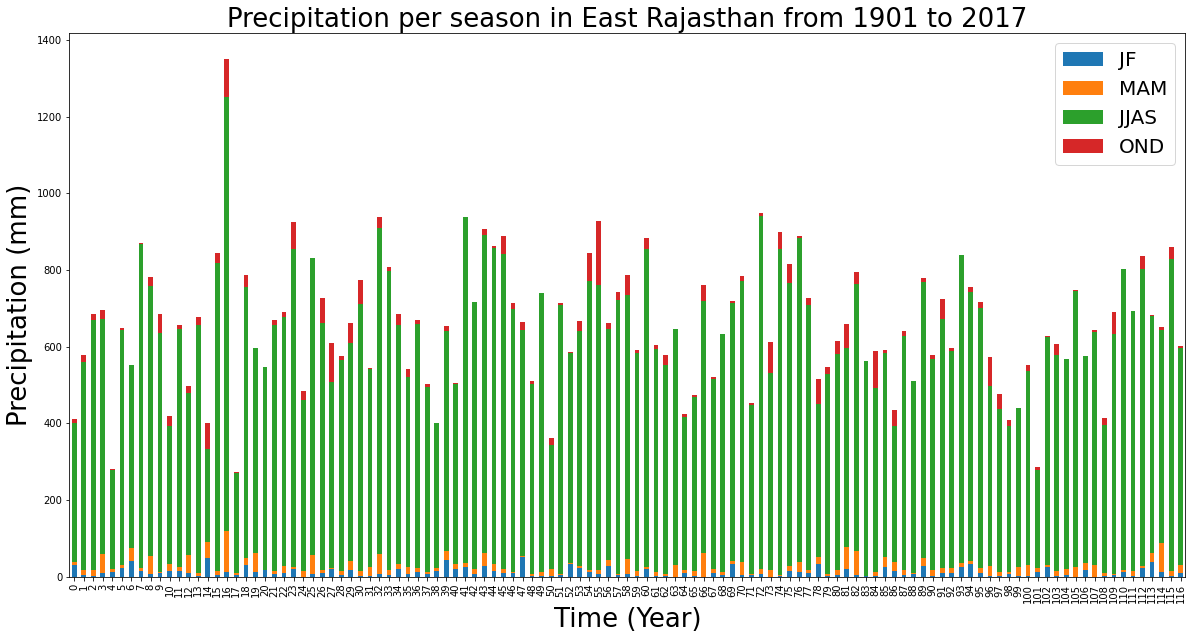

In [9]:
ax = precip[['JF','MAM', 'JJAS', 'OND']].plot(kind='bar', stacked = True, figsize = (20, 10))

ax.plot
ax.legend(fontsize = 20)
ax.set_xlabel('Time (Year)', fontsize=26)
ax.set_ylabel('Precipitation (mm)', fontsize=26)
ax.set_title('Precipitation per season in East Rajasthan from 1901 to 2017', fontsize=26);

# need to fix the axes and title to show up
# need to fix the x-axis values to be years

***
## Annual Precipitation

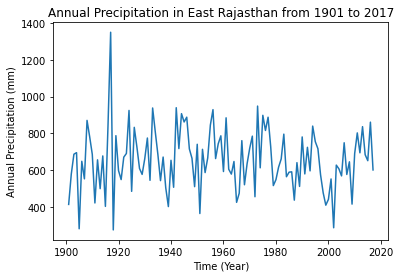

In [10]:
fig, ax = plt.subplots()
ax.plot(precip['YEAR'], precip['ANNUAL'])

ax.set_xlabel('Time (Year)')
ax.set_ylabel('Annual Precipitation (mm)')
ax.set_title('Annual Precipitation in East Rajasthan from 1901 to 2017');

# can see trends of the annual precipitation from 1901 to 2017

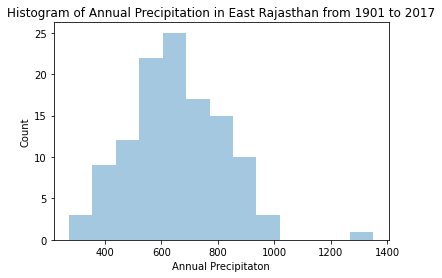

In [11]:
# histogram of annual precipitation
# visualization with matplotlib

sns.distplot(precip['ANNUAL'], kde=False)
plt.xlabel("Annual Precipitaton")
plt.ylabel("Count")
plt.title("Histogram of Annual Precipitation in East Rajasthan from 1901 to 2017");

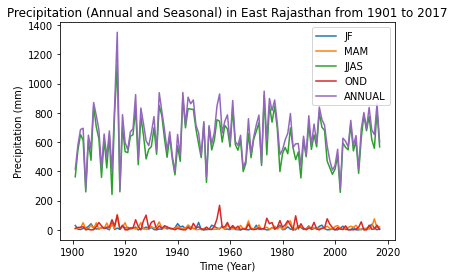

In [12]:
# plot to show precipitation per season and contribution to the annual precipitation
# visualization with matplot lib

fig, ax = plt.subplots()
ax.plot(precip['YEAR'], precip['JF'], label = 'JF')
ax.plot(precip['YEAR'], precip['MAM'], label = 'MAM')
ax.plot(precip['YEAR'], precip['JJAS'], label = 'JJAS')
ax.plot(precip['YEAR'], precip['OND'], label = 'OND')
ax.plot(precip['YEAR'], precip['ANNUAL'], label = 'ANNUAL')

ax.set_xlabel('Time (Year)')
ax.set_ylabel('Precipitation (mm)')
ax.set_title('Precipitation (Annual and Seasonal) in East Rajasthan from 1901 to 2017')
ax.legend();

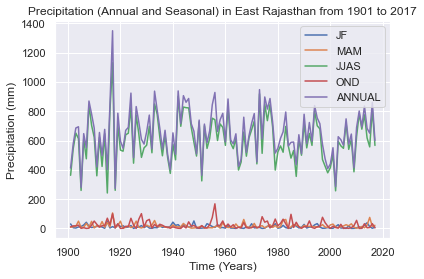

In [13]:
# plot to show precipitation per season and contribution to annual precipitaiton
sns.set()

plt.plot(precip['YEAR'], precip['JF'], label='JF')
plt.plot(precip['YEAR'], precip['MAM'], label='MAM')
plt.plot(precip['YEAR'], precip['JJAS'], label='JJAS')
plt.plot(precip['YEAR'], precip['OND'], label='OND')
plt.plot(precip['YEAR'], precip['ANNUAL'], label='ANNUAL')

plt.legend()
plt.xlabel("Time (Years)")
plt.ylabel('Precipitation (mm)')
plt.title('Precipitation (Annual and Seasonal) in East Rajasthan from 1901 to 2017');

* From the annual precipitation graphs over time, it is evident that the ANNUAL and JJAS (June, July, August, September) rainfall follow the same trends and are close in value. From this, it was decided that the model will be predict annual precipitation, rather than for a specific season since one season (JJAS) makes up the large majority of the rainfall

***
## Seasonal Precipitation

### Proportion of Each Seasons Precipitation to the Annual Average

* from the investigation of the data, it was clear that the JJAS precipitation made up the majority of the ANNUAL precipitation
* the following is used to determine the proportion that each season contributes to the annual rainfall
* the values are all in percent of annual rainfall

In [14]:
percent = pd.DataFrame()
percent['JF'] = precip['JF']/precip['ANNUAL']*100
percent['MAM'] = precip['MAM']/precip['ANNUAL']*100
percent['JJAS'] = precip['JJAS']/precip['ANNUAL']*100
percent['OND'] = precip['OND']/precip['ANNUAL']*100
percent.head()

,JF,MAM,JJAS,OND
0,7.393939,2.060606,87.975758,2.569697
1,0.830019,2.023171,94.155283,2.974235
2,0.393529,2.069669,94.942428,2.594374
3,1.411087,7.113031,88.308135,3.167747
4,4.574696,2.430307,92.780558,0.214439


In [15]:
percent.describe()

,JF,MAM,JJAS,OND
count,117.000000,117.000000,117.000000,117.000000
mean,1.891658,2.699205,91.966219,3.442161
std,2.013989,2.306683,5.449777,3.926238
min,0.000000,0.036510,60.228970,0.000000
25%,0.466644,1.126873,89.809606,0.643934
50%,1.295123,2.015310,93.383241,1.970273
75%,2.871783,3.447754,95.470320,4.443371
max,12.244898,11.572153,99.609444,18.087855


* The average contribution to the annual precipitaton from JJAS (moonsoon seson in India) is 91.966%
* The minimum contribution to annual precipitation from JJAS is 60.229% and the maximum is 99.609%
* Phase 1 of the project will predict the annual precipitation for the next several years and will be used in Phase 2 and Phase 3 to calculate the runoff and dam sizing, respectively. From the annual precipitation, the seasonal precipitation will be estimated with the understanding that JJAS precipitaton contributes about 91.966% to the annual precipitation. Regarding, the extreme case of 99.609%, the dam size will be calculated with factors of safety.

***
# Investigating Temperature Data

In [16]:
# import temperature data
# source: https://data.gov.in/resources/monthly-seasonal-and-annual-mean-temp-series-1901-2017
# uploaded temperature data to github
# values are in degrees celcius

import os
os.chdir(r'C:\\Users\\livsh\\Downloads') 
temp = pd.read_csv('temperature.csv')

In [17]:
temp.head().T

,0,1,2,3,4
YEAR,1901.00,1902.00,1903.00,1904.00,1905.00
JAN,17.99,19.00,18.32,17.77,17.40
FEB,19.43,20.39,19.79,19.39,17.79
MAR,23.49,24.10,22.46,22.95,21.78
APR,26.41,26.54,26.03,26.73,24.84
MAY,28.28,28.68,27.93,27.83,28.32
JUN,28.60,28.44,28.41,27.85,28.69
JUL,27.49,27.29,28.04,26.84,27.67
AUG,26.98,27.05,26.63,26.73,27.47
SEP,26.26,25.95,26.34,25.84,26.29


In [21]:
describe = temp.describe().T
describe

,count,mean,std,min,25%,50%,75%,max
YEAR,116.0,1958.500000,33.630343,1901.00,1929.7500,1958.500,1987.2500,2016.00
JAN,116.0,18.404569,0.581218,17.25,18.0675,18.340,18.7200,20.92
FEB,116.0,20.112586,0.861884,17.79,19.4700,19.985,20.5425,23.58
MAR,116.0,23.415690,0.842945,21.78,22.8325,23.320,23.9150,26.61
APR,116.0,26.491207,0.711790,24.84,25.9900,26.535,26.9025,29.56
MAY,116.0,28.368448,0.617371,26.97,27.9475,28.335,28.7525,30.78
JUN,116.0,28.291121,0.450134,27.33,28.0175,28.250,28.5650,29.88
JUL,116.0,27.361121,0.336064,26.48,27.1500,27.340,27.5150,28.47
AUG,116.0,26.929914,0.332510,26.21,26.7275,26.895,27.1425,28.17
SEP,116.0,26.327414,0.352551,25.47,26.1075,26.310,26.4850,27.72


In [23]:
# average temperature for each month for the range of 1901-2017
temp_monthly_mean = describe['mean']
temp_monthly_mean

YEAR      1958.500000
JAN         18.404569
FEB         20.112586
MAR         23.415690
APR         26.491207
MAY         28.368448
JUN         28.291121
JUL         27.361121
AUG         26.929914
SEP         26.327414
OCT         24.720517
NOV         21.747155
DEC         19.153534
ANNUAL      24.261379
JF          19.236810
MAM         26.067328
JS          27.222414
OND         21.860086
Name: mean, dtype: float64

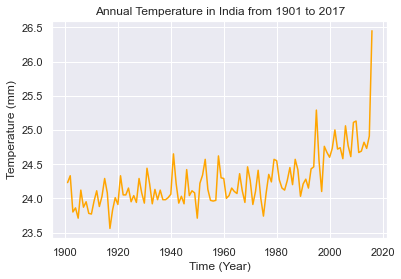

In [25]:
# visualization of temperature data

fig, ax = plt.subplots()
ax.plot(temp['YEAR'], temp['ANNUAL'], color='orange')

ax.set_xlabel('Time (Year)')
ax.set_ylabel('Temperature (mm)')
ax.set_title('Annual Temperature in India from 1901 to 2017');

# can see trends of the annual temperature from 1901 to 2017